# 1. Imports

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import random

# 2. Recolectar Datos y divicion de Datos

## Obtener

In [4]:
data = np.load('proyecto_data/proyecto_training_data.npy')
data.shape

(1460, 6)

In [5]:
df = pd.DataFrame(data, columns = ['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'])
df.head()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


## Validar

Modifico los Nulls de LotFromtage a 0 por su descripcion, ya que indica los pies que tocan al un camino, siendo 0 no toca o null

In [6]:
for col in df:
    porcentaje = df[col].isnull().mean()
    if (porcentaje > 0):
        print(f'{col}: {porcentaje}')

LotFrontage: 0.1773972602739726


In [7]:
df['LotFrontage'].fillna(0, inplace = True)

## Dividir

In [9]:
size = np.shape(data)[0]
secctions = np.split(data, 10) # Dividimos en 10 secciones iguales
training_data = [] 
for i in range(8):
    training_data.append(secctions.pop(random.randint(0,9-i))) # Agarramos 8 de las secciones de manera aleaotria para hacer el 80% de entremaiento
validating_data = secctions # El resto se vuelve el 20% de validacion

In [10]:
# Los transformamos en Numpy Array
training_data = np.array(training_data)
validating_data = np.array(validating_data)

In [11]:
# Unimos las secciones para que tengan la misma forma que el original
training_data = np.reshape(training_data, [np.shape(training_data)[0] * np.shape(training_data)[1], np.shape(training_data)[2]])
validating_data = np.reshape(validating_data, [np.shape(validating_data)[0] * np.shape(validating_data)[1], np.shape(validating_data)[2]])

In [12]:
training_data.shape

(1168, 6)

In [13]:
df_training = pd.DataFrame(training_data, columns = ['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'])
df_training.head()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,90350.0,5.0,694.0,4.0,1913.0,40.0
1,110000.0,6.0,684.0,7.0,1920.0,67.0
2,555000.0,10.0,2402.0,10.0,2008.0,105.0
3,118000.0,4.0,1440.0,8.0,1955.0,92.0
4,162900.0,5.0,1128.0,8.0,1930.0,52.0


In [14]:
validating_data.shape

(292, 6)

In [15]:
df_validating = pd.DataFrame(validating_data, columns = ['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'])
df_validating.head()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,236500.0,8.0,1616.0,5.0,1995.0,39.0
1,187500.0,7.0,1146.0,6.0,2003.0,73.0
2,222500.0,7.0,1153.0,8.0,1998.0,75.0
3,131400.0,5.0,1144.0,6.0,1961.0,80.0
4,108000.0,5.0,948.0,6.0,1968.0,0.0


# 3. Anáslisis Exploratorio

## Funciones

In [16]:
def Analisis_Exploratorio(df):
    for col in df:
        df_describe = df[col].describe()
        print("---->\t" + col)

        print("Media:\t\t", df_describe['mean'])
        print("Minimo:\t\t", df_describe['min'])
        print("Maximo:\t\t", df_describe['max'])
        print("Rango:\t\t", (df_describe['max'] - df_describe['min']))
        print("Desviacion:\t", df_describe['std'])


        print("---------------------------------")
        print("---------------------------------")

## Sobre Data

In [17]:
Analisis_Exploratorio(df)

---->	SalePrice
Media:		 180921.19589041095
Minimo:		 34900.0
Maximo:		 755000.0
Rango:		 720100.0
Desviacion:	 79442.50288288663
---------------------------------
---------------------------------
---->	OverallQual
Media:		 6.0993150684931505
Minimo:		 1.0
Maximo:		 10.0
Rango:		 9.0
Desviacion:	 1.3829965467415923
---------------------------------
---------------------------------
---->	1stFlrSF
Media:		 1162.626712328767
Minimo:		 334.0
Maximo:		 4692.0
Rango:		 4358.0
Desviacion:	 386.5877380410738
---------------------------------
---------------------------------
---->	TotRmsAbvGrd
Media:		 6.517808219178082
Minimo:		 2.0
Maximo:		 14.0
Rango:		 12.0
Desviacion:	 1.625393290584064
---------------------------------
---------------------------------
---->	YearBuilt
Media:		 1971.267808219178
Minimo:		 1872.0
Maximo:		 2010.0
Rango:		 138.0
Desviacion:	 30.202904042525265
---------------------------------
---------------------------------
---->	LotFrontage
Media:		 57.62328767123287

## Sobre Training

In [18]:
Analisis_Exploratorio(df_training)

---->	SalePrice
Media:		 181693.91866438356
Minimo:		 34900.0
Maximo:		 755000.0
Rango:		 720100.0
Desviacion:	 80741.5600277083
---------------------------------
---------------------------------
---->	OverallQual
Media:		 6.1104452054794525
Minimo:		 1.0
Maximo:		 10.0
Rango:		 9.0
Desviacion:	 1.404104818547387
---------------------------------
---------------------------------
---->	1stFlrSF
Media:		 1167.7183219178082
Minimo:		 334.0
Maximo:		 4692.0
Rango:		 4358.0
Desviacion:	 395.56127654628
---------------------------------
---------------------------------
---->	TotRmsAbvGrd
Media:		 6.5256849315068495
Minimo:		 2.0
Maximo:		 14.0
Rango:		 12.0
Desviacion:	 1.6175000154439694
---------------------------------
---------------------------------
---->	YearBuilt
Media:		 1971.1823630136987
Minimo:		 1872.0
Maximo:		 2010.0
Rango:		 138.0
Desviacion:	 30.32797239760438
---------------------------------
---------------------------------
---->	LotFrontage
Media:		 57.861301369863014

## Sobre Validating

In [19]:
Analisis_Exploratorio(df_validating)

---->	SalePrice
Media:		 177830.30479452055
Minimo:		 55993.0
Maximo:		 582933.0
Rango:		 526940.0
Desviacion:	 74069.68096989742
---------------------------------
---------------------------------
---->	OverallQual
Media:		 6.054794520547945
Minimo:		 2.0
Maximo:		 10.0
Rango:		 8.0
Desviacion:	 1.2964706090410747
---------------------------------
---------------------------------
---->	1stFlrSF
Media:		 1142.2602739726028
Minimo:		 438.0
Maximo:		 2898.0
Rango:		 2460.0
Desviacion:	 348.27639525035937
---------------------------------
---------------------------------
---->	TotRmsAbvGrd
Media:		 6.486301369863014
Minimo:		 3.0
Maximo:		 12.0
Rango:		 9.0
Desviacion:	 1.6590325561200288
---------------------------------
---------------------------------
---->	YearBuilt
Media:		 1971.609589041096
Minimo:		 1875.0
Maximo:		 2009.0
Rango:		 134.0
Desviacion:	 29.7463211015164
---------------------------------
---------------------------------
---->	LotFrontage
Media:		 56.67123287671233


# 4. Histogramas

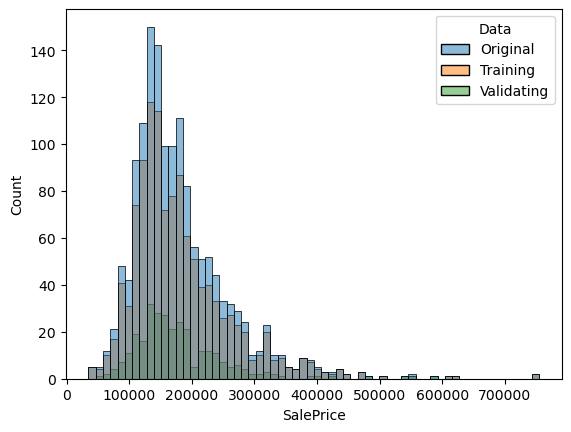

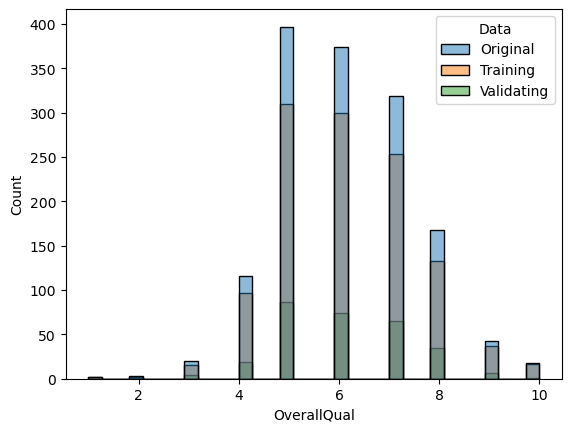

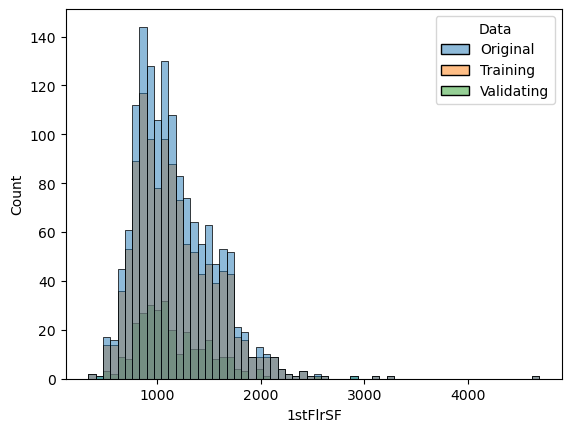

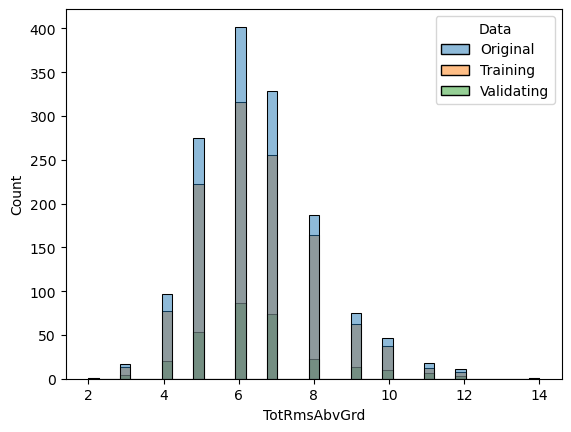

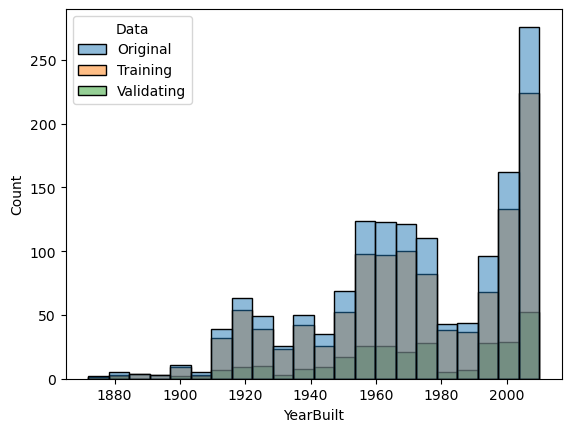

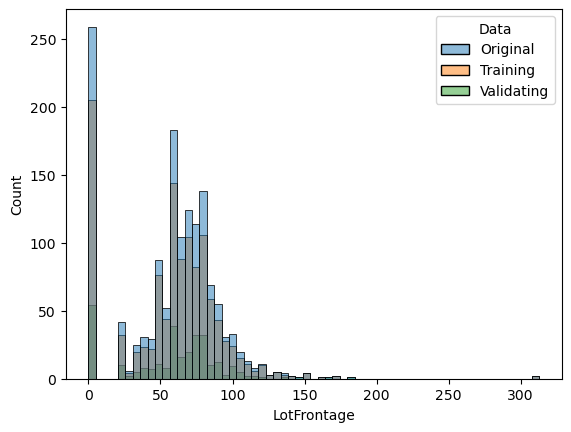

In [20]:
df['Data'] = np.full((df.shape[0]), 'Original')
df_training['Data'] = np.full((df_training.shape[0]), 'Training')
df_validating['Data'] = np.full((df_validating.shape[0]), 'Validating')
df_temp = pd.concat([df, df_training, df_validating], ignore_index = True) 

for col in df_temp.columns[:-1]:    
    sns.histplot(data=df_temp, x=col, hue='Data')
    plt.show()
    

df.drop('Data', axis = 1, inplace = True)
df_training.drop('Data', axis = 1, inplace = True)
df_validating.drop('Data', axis = 1, inplace = True)
del df_temp

### 5. Variables Independientes

## Funciones

In [21]:
def Analisis_var(df):
    corr = {}
    for col in df.columns[1:]:
        temp = np.corrcoef(x = df[col], y = df['SalePrice'])[0][1]
        corr[col] = temp
        plt.scatter(x =  df[col], y = df['SalePrice'])
        titulo = col + " | Correlacion: " + str(temp)
        plt.title(titulo)
        plt.show()
    dict(sorted(corr.items(), key=lambda item: item[1]))
    return list(corr.items())[0:2]

## Sobre Data

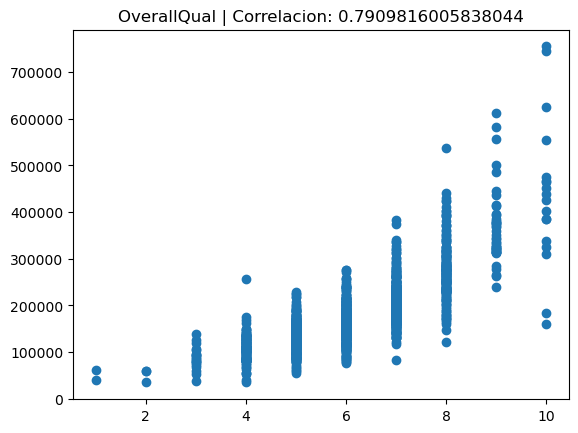

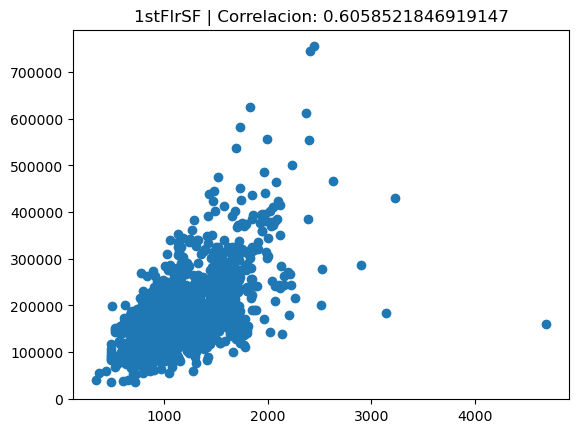

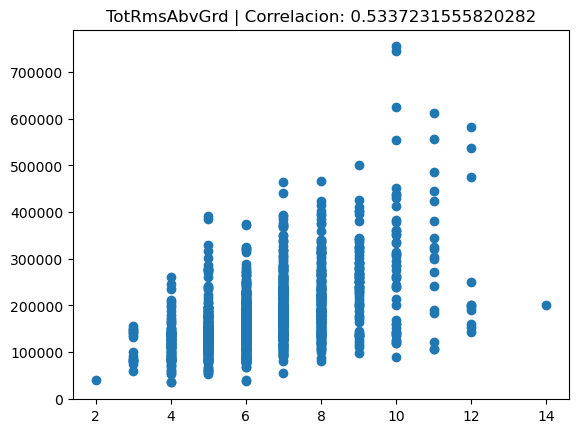

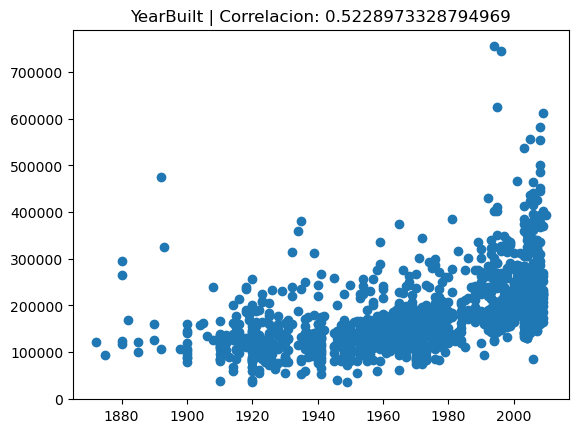

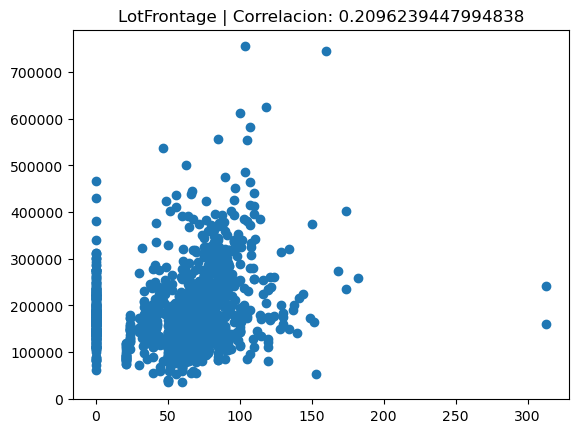

OverallQual: 0.7909816005838044
1stFlrSF: 0.6058521846919147


In [22]:
mejor_2_corr = Analisis_var(df)
for corr in mejor_2_corr:
    print(f'{corr[0]}: {corr[1]}')

## Sobre Training

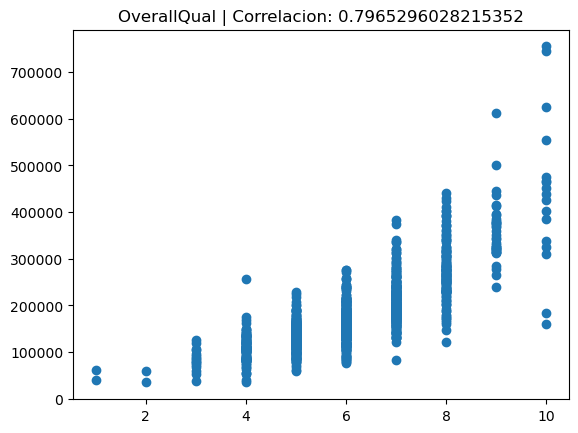

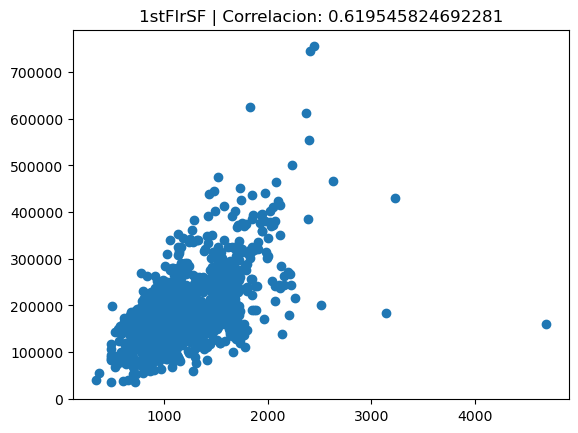

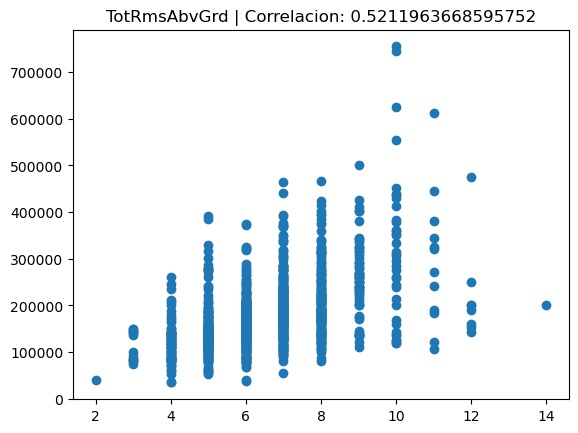

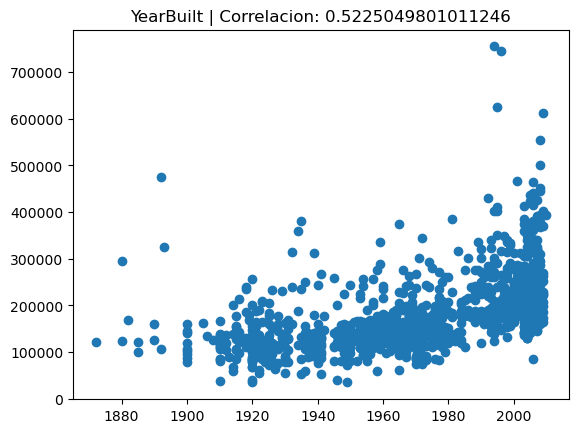

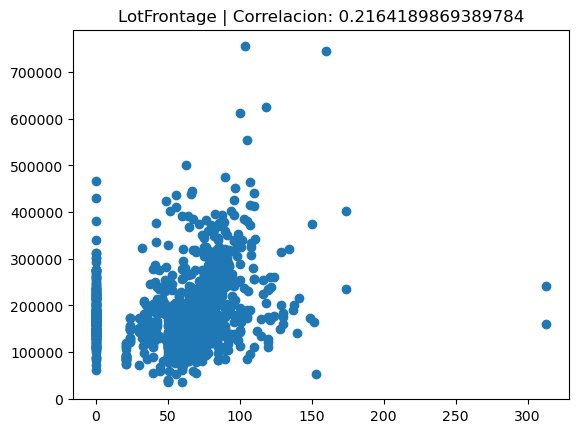

OverallQual: 0.7965296028215352
1stFlrSF: 0.619545824692281


In [23]:
mejor_2_corr = Analisis_var(df_training)
for corr in mejor_2_corr:
    print(f'{corr[0]}: {corr[1]}')

## Sobre Validating

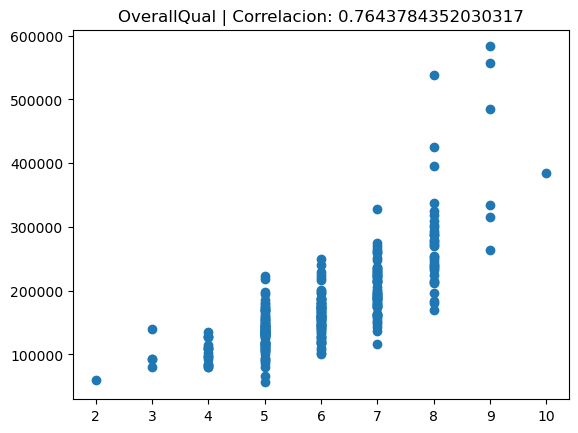

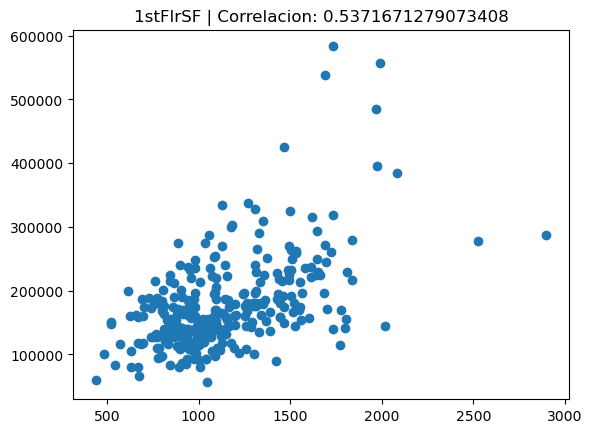

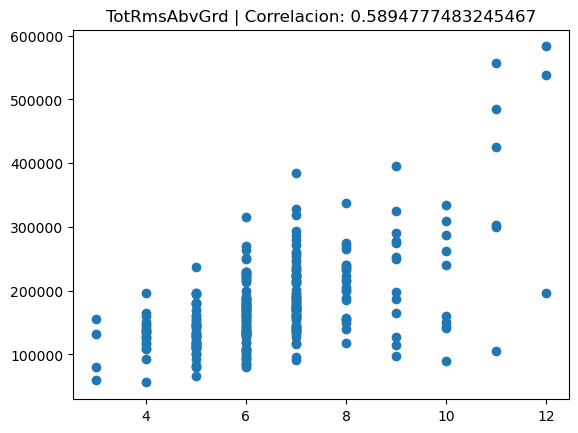

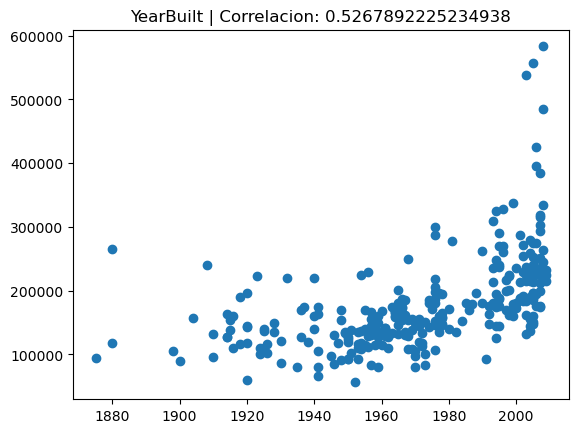

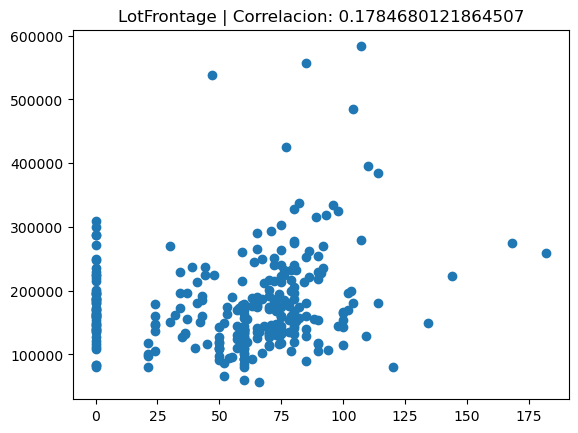

OverallQual: 0.7643784352030317
1stFlrSF: 0.5371671279073408


In [24]:
mejor_2_corr = Analisis_var(df_validating)
for corr in mejor_2_corr:
    print(f'{corr[0]}: {corr[1]}')

# 6. Regresion Lineal

##  Funciones

In [25]:
y = df_training['SalePrice'].values
epochs = 50
imprimir_error_cada = 10
alpha = 0.2

In [221]:
def regresion_linal(x, y, epochs, imprimir_error_cada, alpha):
    # Inicializacion
    betas = np.array([random.random(), random.random()])
    matris = np.stack((x, np.ones(len(x))), axis = 1)
    betas_l = [betas]
    costos = []
    for e in range(epochs):
        # Y_prima
        y_= np.dot(matris, betas)

        # Costo
        costo = np.sum((y-y_)**2)/(2*len(y))
        costos.append(costo)

        # Nuevos Betas
        b0_ = np.sum((y_-y))/len(y)
        b1_ = np.sum((y_-y)*x)/len(y)
        betas_primas = np.array([b1_, b0_])
        #betas[0] = betas[0] - (b1_*alpha)
        #betas[1] = betas[1] - (b0_*alpha)
        betas = (betas) - (betas_primas*alpha)
        
        betas_l.append(betas)
        
        # Costo Print
        if (e%imprimir_error_cada) == 0 :
            print(f'Epoch {e}\t Costo:{costo}')
    
    return (np.array(betas_l), costos)        

In [222]:
def visualisar_costo(costos):
    plt.plot(range(len(costos)), costos)
    plt.xlabel('Epoch')
    plt.ylabel('Costo')
    plt.show()

In [234]:
def visualisar_betas(betas, n):
    betas = betas[::n]
    plt.plot(range(len(betas[:, 0])), betas[:, 0], label = 'B1')
    plt.plot(range(len(betas[:, 1])), betas[:, 1], label = 'B0')
    plt.xlabel('Epoch')
    plt.ylabel('Betas')
    plt.legend()
    plt.show()

## Regresion OverallQual

In [ ]:
reg = regresion_linal(df_training['OverallQual'].values, y, 10000, 1000, 0.005)
#visualisar_costo(reg[1])
visualisar_betas(reg[0], 20)

Epoch 0	 Costo:19763071958.8062
Epoch 1000	 Costo:1352904165.9241312
Epoch 2000	 Costo:1290055760.786928
Epoch 3000	 Costo:1251528296.3827977
Epoch 4000	 Costo:1227910107.3425028
